In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\User\\Dropbox\\KR22100004527\\Data Science Bootcamp\\T36'

In [3]:
# read dataset
penguin_df = pd.read_csv(r'C:\\Users\\User\\Dropbox\\KR22100004527\\Data Science Bootcamp\\T36\datasets\penguins_size.csv')
penguin_df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
penguin_df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguin_df.shape


(344, 7)

In [7]:
#Droping the two null rows from body_mass_g field
penguin_df['body_mass_g'] = penguin_df.drop(penguin_df[penguin_df['body_mass_g'].isnull()].index , axis=0, inplace=True)
#penguin_df[penguin_df['body_mass_g'].isnull()]

In [8]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        0 non-null      object 
 6   sex                334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 21.4+ KB


In [9]:
for col in penguin_df.select_dtypes(include='object').columns:
   print(penguin_df[col].value_counts())


Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64
Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64
Series([], Name: body_mass_g, dtype: int64)
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [16]:
#checking '.' values in sex column

penguin_df[penguin_df['sex'] == '.']



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,None,.


In [17]:
penguin_df[penguin_df.isnull().any(axis=1)]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,None,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,None,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,None,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,None,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,None,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,None,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,None,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,None,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,None,FEMALE


In [18]:
#Deleting a record with '.' value in sex variable

penguin_df.drop(penguin_df[penguin_df['sex']=='.'].index, inplace = True)

#imputing the null values in sex with its mode

penguin_df['sex'] = penguin_df['sex'].fillna('MALE')

In [19]:
penguin_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

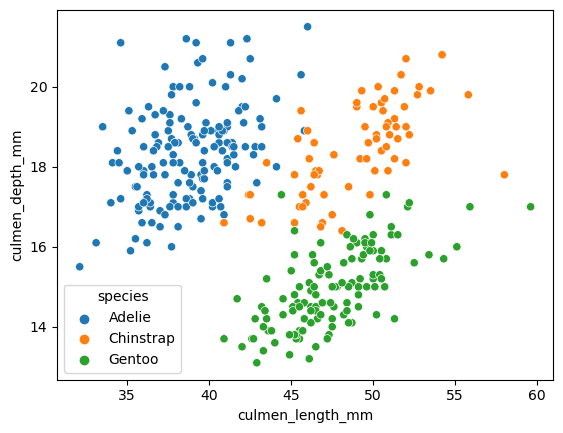

In [20]:
sns.scatterplot( x = "culmen_length_mm", y = "culmen_depth_mm", 
                 data = penguin_df, 
                 hue = "species")


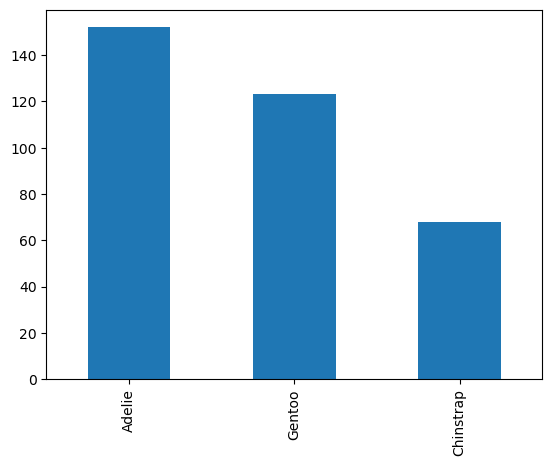

In [11]:
penguin_df['species'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

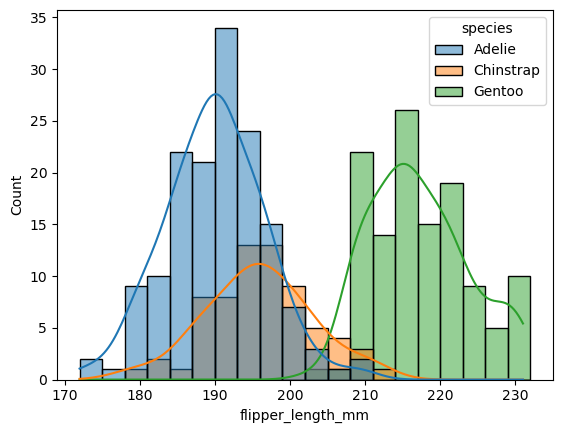

In [47]:
sns.histplot( data = penguin_df,x = "flipper_length_mm",binwidth=3,kde=True,hue="species")

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

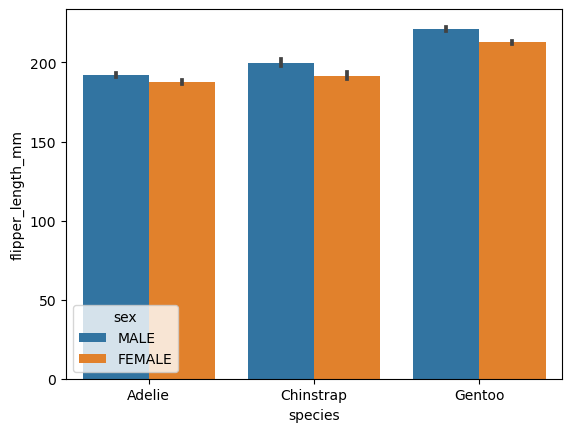

In [48]:
sns.barplot(data=penguin_df,x='species',y='flipper_length_mm',hue='sex')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

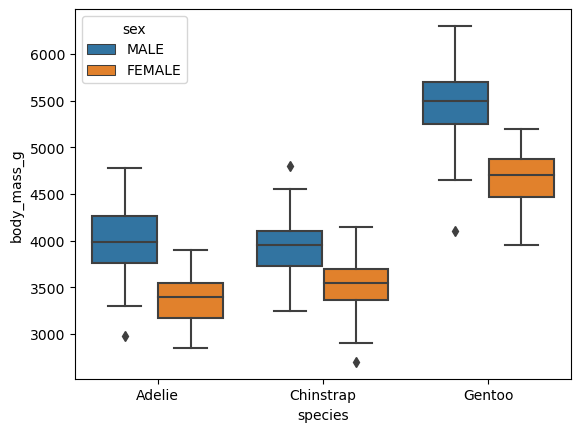

In [54]:
sns.boxplot(x = "species", y = "body_mass_g", hue='sex',data = penguin_df)

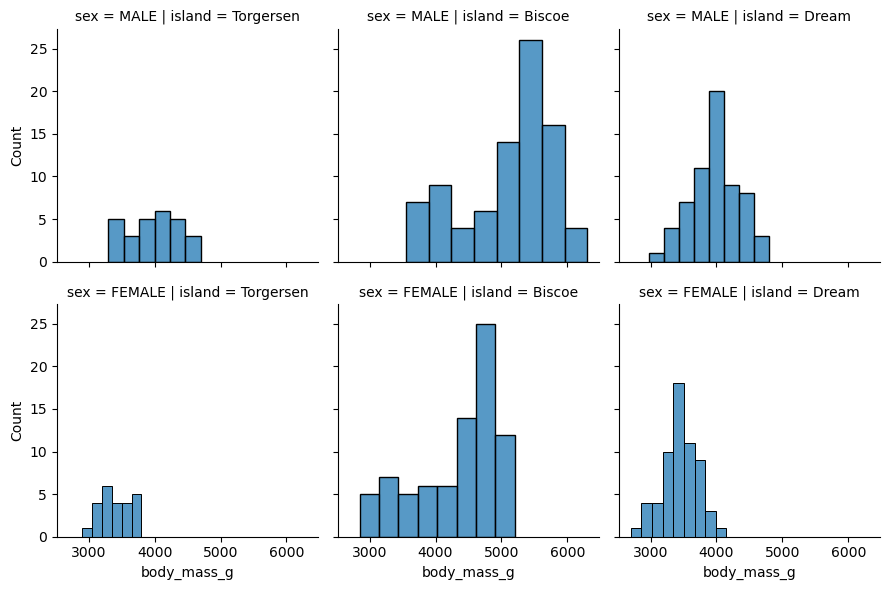

In [63]:
sns.FacetGrid(data = penguin_df, col="island", row="sex").map(sns.histplot,"body_mass_g")

<AxesSubplot:>

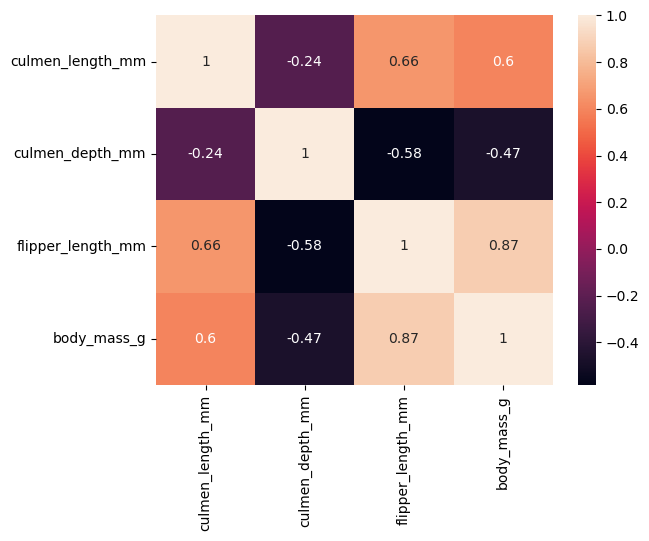

In [65]:
sns.heatmap(penguin_df.corr(),annot=True)